 **Name: IMTIAZ HUSSAIN**
 
**Seat No.:B18101044**

**Preprocessing:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

Reading from csv data file into dataframe:



In [2]:
df=pd.read_csv('/content/Spotify 2010 - 2019 Top 100.csv')

Print Data:

In [3]:
df.describe()

year released         bpm        nrgy        dnce          dB  \
count     998.000000  998.000000  998.000000  998.000000  998.000000   
mean     2014.380762  121.300601   69.543086   66.892786   -5.586172   
std         3.238019   26.248290   16.000741   13.134728    3.137454   
min      1975.000000   65.000000    6.000000   19.000000  -18.000000   
25%      2012.000000  100.000000   59.000000   59.000000   -7.000000   
50%      2014.000000  122.000000   71.500000   68.000000   -5.000000   
75%      2017.000000  134.000000   81.750000   75.000000   -4.000000   
max      2021.000000  206.000000  105.000000   96.000000   70.000000   

             live         val         dur       acous        spch         pop  \
count  998.000000  998.000000  998.000000  998.000000  998.000000  998.000000   
mean    17.916834   50.834669  220.308617   14.610220   10.051102   74.779559   
std     13.451876   21.572618   40.164893   20.490411    9.288230    9.048488   
min     -5.000000    2.000000   93.000000    0.000000    2.000000   10.000000   
25%      9.000000   35.000000  197.000000    2.000000    4.000000   70.000000   
50%     12.000000   50.000000  216.000000    6.000000    6.000000   76.000000   
75%     23.000000   68.000000  237.000000   19.000000   12.000000   81.000000   
max     83.000000   97.000000  688.000000  217.000000   53.000000   95.000000   

          top year  
count   998.000000  
mean   2014.490982  
std       2.869516  
min    2010.000000  
25%    2012.000000  
50%    2014.000000  
75%    2017.000000  
max    2019.000000

Counting missing values:

In [4]:
print(df.isnull().sum())

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64


Filling missing values with mean:

In [7]:
df['bpm'].fillna(df['bpm'].mean(),inplace=True)

Outlier Detection:

In [9]:
q1=df['bpm'].quantile(0.25)
print("Q1: ",q1)

q2=df['bpm'].quantile(0.5)
print("Q2: ",q2)

q3=df['bpm'].quantile(0.75)
print("Q3: ",q3)

iqr=q3-q1
print("IQR: ",iqr)

lowerLimit=q1-1.5*iqr
print("Lower limit: ",lowerLimit)

upperLimit=q3+1.5*iqr
print("Upper limit: ",upperLimit)


#Listing Outlier
df[(df.bpm<lowerLimit) & (df.bpm>upperLimit)]

Q1:  100.0
Q2:  122.0
Q3:  134.0
IQR:  34.0
Lower limit:  49.0
Upper limit:  185.0


Empty DataFrame
Columns: [title, artist, top genre, year released, added, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop, top year, artist type]
Index: []

Removing values that are outliers:

In [11]:
df=df[((df.bpm>=q1-1.5*iqr) & (df.bpm<=q3+1.5*iqr))]

**Classification:**

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pandas as pd 

Assign values to the X and y variables:

In [13]:
y = df['top year']
X = df.drop(['year released','added','top year','title','artist','top genre','added','artist type'], axis=1 )

Splitting in test and train:

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print("Test count: ",y_test.count())
print("Train count: ",y_train.count())

Test count:  322
Train count:  653


Generating naive bayes classifier:

In [15]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

'''scaling data, converting all the columns to smaller range of values like normalization but can only be applied if all columns are numerical'''
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

'''fitting classifier -- training classifier'''
clf = clf.fit(X_train,y_train)
#predicting
y_pred=clf.predict(X_test)

'''making confusion matrix'''
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print("Confusion Report: \n",classification_report(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print()
print("Accuracy of Naive Bayes :",metrics.accuracy_score(y_test, y_pred))

Confusion Report: 
               precision    recall  f1-score   support

        2010       0.20      0.37      0.26        35
        2011       0.27      0.11      0.16        27
        2012       0.00      0.00      0.00        35
        2013       0.00      0.00      0.00        36
        2014       0.09      0.19      0.12        31
        2015       0.10      0.34      0.16        29
        2016       0.14      0.12      0.13        24
        2017       0.11      0.05      0.07        37
        2018       0.19      0.12      0.15        33
        2019       0.38      0.14      0.21        35

    accuracy                           0.14       322
   macro avg       0.15      0.15      0.13       322
weighted avg       0.15      0.14      0.12       322

Confusion Matrix: 
 [[13  1  0  0 13  7  1  0  0  0]
 [ 9  3  0  0  8  6  1  0  0  0]
 [10  0  0  3 10  9  1  0  1  1]
 [ 9  1  0  0  7 12  3  2  1  1]
 [10  2  0  1  6  8  3  1  0  0]
 [ 4  0  0  0  8 10  4  2  0  1]
 [ 

Generating logistic regression classifier:

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

'''scaling data, converting all the columns to smaller range of values like normalization but can only be applied if all columns are numerical'''
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

'''fitting classifier -- training classifier'''
clf = clf.fit(X_train,y_train)
#predicting
y_pred=clf.predict(X_test)

'''making confusion matrix'''
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print("Confusion Report: \n",classification_report(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print()
print("Accuracy of Logistic Regression :",metrics.accuracy_score(y_test, y_pred))

Confusion Report: 
               precision    recall  f1-score   support

        2010       0.31      0.23      0.26        35
        2011       0.14      0.30      0.19        27
        2012       0.13      0.14      0.14        35
        2013       0.13      0.06      0.08        36
        2014       0.09      0.10      0.10        31
        2015       0.14      0.07      0.09        29
        2016       0.12      0.25      0.16        24
        2017       0.25      0.24      0.25        37
        2018       0.26      0.27      0.27        33
        2019       0.42      0.23      0.30        35

    accuracy                           0.19       322
   macro avg       0.20      0.19      0.18       322
weighted avg       0.21      0.19      0.19       322

Confusion Matrix: 
 [[ 8  8  6  2  5  0  3  2  0  1]
 [ 2  8  7  0  6  1  1  0  2  0]
 [ 4  5  5  6  4  5  3  2  0  1]
 [ 3  7  3  2  6  3  7  2  1  2]
 [ 4  9  3  1  3  0  7  2  1  1]
 [ 1  3  4  2  2  2 10  4  1  0]
 [ 

Generating decision tree classifier with entropy:

|--- feature_6 <= 191.50
|   |--- feature_1 <= 85.50
|   |   |--- feature_0 <= 116.50
|   |   |   |--- class: 2019
|   |   |--- feature_0 >  116.50
|   |   |   |--- class: 2019
|   |--- feature_1 >  85.50
|   |   |--- feature_8 <= 7.50
|   |   |   |--- class: 2013
|   |   |--- feature_8 >  7.50
|   |   |   |--- class: 2014
|--- feature_6 >  191.50
|   |--- feature_1 <= 80.50
|   |   |--- feature_2 <= 81.50
|   |   |   |--- class: 2016
|   |   |--- feature_2 >  81.50
|   |   |   |--- class: 2017
|   |--- feature_1 >  80.50
|   |   |--- feature_0 <= 124.50
|   |   |   |--- class: 2010
|   |   |--- feature_0 >  124.50
|   |   |   |--- class: 2011

Confusion Report: 
               precision    recall  f1-score   support

        2010       0.18      0.26      0.21        35
        2011       0.08      0.26      0.13        27
        2012       0.00      0.00      0.00        35
        2013       0.00      0.00      0.00        36
        2014       0.07      0.16      0.10        31
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


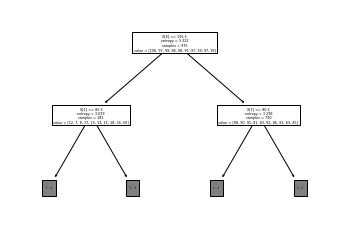

In [17]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
#by default gini index is used, if you want to use entropy
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
decision_tree = clf.fit(X, y)

'''exporting and prinintg decision tree'''

from sklearn.tree import export_text
tree.plot_tree(decision_tree,max_depth=1)
r = export_text(clf)
print(r)

'''scaling data, converting all the columns to smaller range of values like normalization but can only be applied if all columns are numerical'''
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

'''fitting classifier -- training classifier'''
clf = clf.fit(X_train,y_train)
#predicting
y_pred=clf.predict(X_test)

'''making confusion matrix'''
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print("Confusion Report: \n",classification_report(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print()
print("Accuracy of Decision Tree with Entropy :",metrics.accuracy_score(y_test, y_pred))
print()

Generating decision tree classifier with Gini Index:

|--- feature_6 <= 191.50
|   |--- feature_1 <= 85.50
|   |   |--- feature_6 <= 159.00
|   |   |   |--- class: 2019
|   |   |--- feature_6 >  159.00
|   |   |   |--- class: 2019
|   |--- feature_1 >  85.50
|   |   |--- feature_7 <= 18.50
|   |   |   |--- class: 2014
|   |   |--- feature_7 >  18.50
|   |   |   |--- class: 2019
|--- feature_6 >  191.50
|   |--- feature_1 <= 80.50
|   |   |--- feature_2 <= 79.50
|   |   |   |--- class: 2016
|   |   |--- feature_2 >  79.50
|   |   |   |--- class: 2017
|   |--- feature_1 >  80.50
|   |   |--- feature_0 <= 123.50
|   |   |   |--- class: 2010
|   |   |--- feature_0 >  123.50
|   |   |   |--- class: 2011

Confusion Report: 
               precision    recall  f1-score   support

        2010       0.17      0.09      0.11        35
        2011       0.00      0.00      0.00        27
        2012       0.22      0.23      0.22        35
        2013       0.00      0.00      0.00        36
        2014       0.00      0.00      0.00        31


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


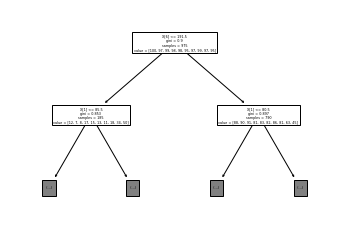

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
#by default gini index is used, if you want to use entropy
clf = tree.DecisionTreeClassifier( max_depth=3)
decision_tree = clf.fit(X, y)

'''exporting and prinintg decision tree'''

from sklearn.tree import export_text
tree.plot_tree(decision_tree,max_depth=1)
r = export_text(clf)
print(r)


'''scaling data, converting all the columns to smaller range of values like normalization but can only be applied if all columns are numerical'''
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

'''fitting classifier -- training classifier'''
clf = clf.fit(X_train,y_train)
#predicting
y_pred=clf.predict(X_test)

'''making confusion matrix'''
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print("Confusion Report: \n",classification_report(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print()
print("Accuracy of Decision Tree with Gini Index :",metrics.accuracy_score(y_test, y_pred))
print()